# Introdução à Aprendizgem Supervisionada

---

Esse tipo de aprendizagem é provavelmente o mais comum, tanto na academia quanto no mercado. Ele consiste em utilizar os dados e informações já existentes para aprender que essa informação é obtida apartir dos dados.

Para começar, vamos supor o seguinte conjunto de dados.

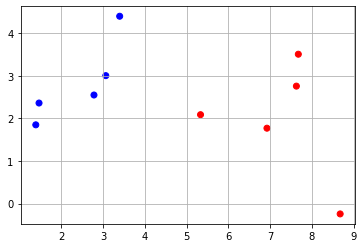

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X =np.array([[2.7810836, 2.550537],
             [1.46548937, 2.36212508],
             [3.39656169, 4.40029353],
             [1.38807019, 1.85022032],
             [3.06407232, 3.00530597],
             [7.62753121, 2.75926224],
             [5.33244125, 2.08862677],
             [6.92259672, 1.77106367],
             [8.67541865, -0.24206865],
             [7.67375647, 3.50856301]])

Y = np.array(['b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r'])

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.grid()

Suponha também que agora temos um novo dado (o qual está em preto na forma de um losângulo).

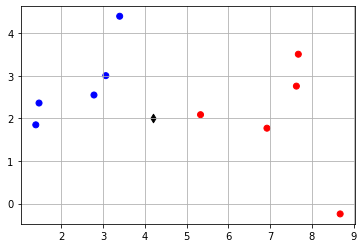

In [ ]:
p_x = np.array([[4.2, 2]])
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(p_x[:, 0], p_x[:, 1], c='k', marker='d')
plt.grid()

A qual grupo pertence esse novo elemento? Azuis ou vermelhos?

Como que tomamos essa decisão?

Só tem um jeito de descobrir?

*"Diga-me com quem tu andas que eu direi quem tu és"*

Esse é o princípio mais intuitivo quando falamos sobre classificar dados. É natural à mente humana querer categorizar algo a partir de seus próximos. Sendo assim, nada mais justo do que utilizar essa filosofia como método de aprendizagem!

Esse método é chamado de **K-Nearest-Neighbors** (ou *KNN*, para os mais chegados). Ele é bem simples: um elemento pertence a classe dos elementos mais próximos a ele. Pronto. Fim.

Vamos identificar quem é o vizinho mais próximo de nosso novo ponto.

In [ ]:
import pandas as pd

def dist_euclidiana(data, p):
  x = (data - p) ** 2
  return np.sqrt(np.sum(x, axis=1))

df = pd.DataFrame(data=X)
df['color'] = Y
df['dist_euc'] = dist_euclidiana(X, p_x)
df = df.sort_values(by='dist_euc')
df

,0,1,color,dist_euc
6,5.332441,2.088627,r,1.135904
4,3.064072,3.005306,b,1.516895
0,2.781084,2.550537,b,1.521977
2,3.396562,4.400294,b,2.531190
7,6.922597,1.771064,r,2.732205
1,1.465489,2.362125,b,2.758384
3,1.388070,1.850220,b,2.815916
5,7.627531,2.759262,r,3.510620
9,7.673756,3.508563,r,3.787182
8,8.675419,-0.242069,r,5.005621


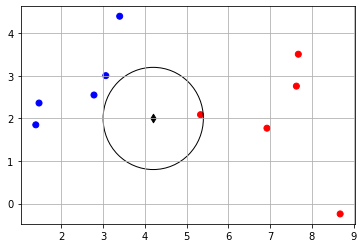

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(p_x[:, 0], p_x[:, 1], c='k', marker='d')
plt.grid()
plt.gcf().gca().add_artist(plt.Circle((p_x[0, 0], p_x[0, 1]), 1.2, fill=False))

Na imagem acima, analisamos os elementos mais próximos. Ambos são roxos. Logo, podemos dizer que o novo dados será roxo! Super simples!

Experimente agora aumentar o número de vizinhos para, digamos, analizar os 3 mais próximos. O que acontece?

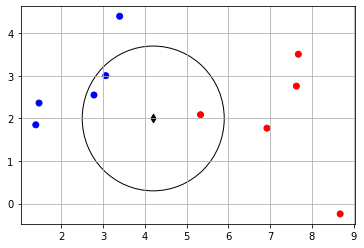

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(p_x[:, 0], p_x[:, 1], c='k', marker='d')
plt.grid()
plt.gcf().gca().add_artist(plt.Circle((p_x[0, 0], p_x[0, 1]), 1.7, fill=False))

## Legal, mas só posso usar o **KNN** para classificar os elementos? E se quisesse, digamos, estimar preços de casas?

Bom, vamos ver se dá certo! Imagine que temos o seguinte conjunto de casas, onde temos a área (em m^2) e o preço de cada uma delas: 

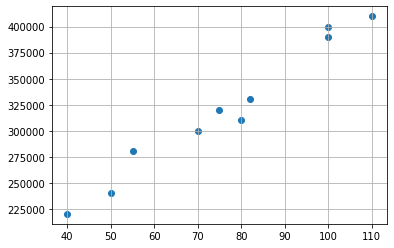

In [ ]:
H = np.array([[100],
  [110],
  [50],
  [70],
  [80],
  [40],
  [100],
  [55],
  [75],
  [82]             
])

P = np.array([400000, 410000, 240000, 300000, 310000, 220000, 390000, 280000, 320000, 330000])
plt.scatter(H[:, 0], P)
plt.grid()

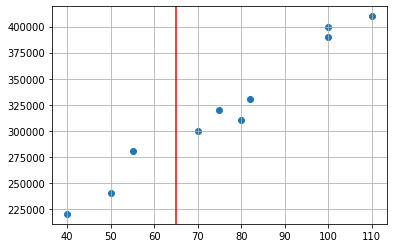

In [ ]:
a = 65
plt.scatter(H[:, 0], P)
plt.axvline(x=a, c='r')
plt.grid()

In [ ]:
df = pd.DataFrame(data=H)
df['price'] = P
df['dist'] = np.abs(H[:, 0] - a)
df = df.sort_values(by='dist')
df

,0,price,dist
3,70,300000,5
7,55,280000,10
8,75,320000,10
2,50,240000,15
4,80,310000,15
9,82,330000,17
5,40,220000,25
0,100,400000,35
6,100,390000,35
1,110,410000,45


Então, o que podemos fazer? Podemos usar o *KNN* para estimar o preço da casa?

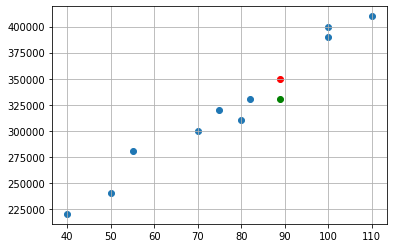

In [ ]:
a = 89

df = pd.DataFrame(data=H)
df['price'] = P
df['dist'] = np.abs(H[:, 0] - a)
df = df.sort_values(by='dist')

p_mean = np.mean(df['price'].values[0:5])
p_median = np.median(df['price'].values[0:5])

plt.scatter(H[:, 0], P)
plt.scatter([a], [p_mean], c='r')
plt.scatter([a], [p_median], c='g')
plt.grid()

# Tá, você me convenceu, *KNN* é legal. Mas implementar isso deve ser chato...

Fazer queijo também dá trabalho, mas você não deixa de comer, certo? O que você faz? Pega um pronto!

Existe uma biblioteca em Python chamada Scikit-Learn que já traz isso tudo implementado. Para esses exemplos, precisamos importar apenas 2 módulo.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

Agora, é só seguir 3 passos:
- Criar o modelo desejado, informando o número de vizinhos a serem consultados.
- Ajustar seu modelo, mandando os dados que você já tem *(fit)*.
- Estimular o valor do novo dado utilizando o modelo treinado *(predict)*.

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, Y)
print("Que cor deve ser pintado o elemento localizado na coordenada ({} {})? {}".\
      format(p_x[0, 0], p_x[0, 1], model.predict(p_x)[0]))

Que cor deve ser pintado o elemento localizado na coordenada (4.2 2.0)? b


In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(H, P)

print("Qual o preço da casa de área {} m^2? {}".\
      format(a, model.predict([[a]])[0]))

Qual o preço da casa de área 89 m^2? 346666.6666666667


# Alguns questionamentos interessantes:

- Que valores de *k* devemos usar? Grandes? Pequenos? Médios?
- É uma boa ideia utilizar como *k* o número total de dados?
- Capitu traiu Bentinho?

In [ ]:
from sklearn.neighbors import NearestCentroid
model = NearestCentroid()
model.fit(X, Y)
print("Que cor deve ser pintado o elemento localizado na coordenada ({}, {})? {}".\
      format(p_x[0, 0], p_x[0, 1], model.predict(p_x)[0]))

Que cor deve ser pintado o elemento localizado na coordenada (4.2, 2.0)? b
